In [1]:
import re, nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from wordcloud import WordCloud
from PIL import Image

In [4]:
with open("Quo_vadis.txt", encoding="utf8") as myfile:
    data = " ".join(line.rstrip() for line in myfile)

In [5]:
print(data[:200])

Henryk Sienkiewicz  Quo vadis  ISBN 978-83-288-2832-2     Rozdział pierwszy  Petroniusz obudził się zaledwie koło południa i jak zwykle, zmęczony bardzo. Poprzedniego dnia był na uczcie u Nerona, któr


In [6]:
with open("polish_stopwords.txt", encoding="utf8") as myfile:
    stop_text = " ".join(line.rstrip() for line in myfile)

stopWords = set(stop_text.split(" "))


In [7]:
text = re.sub(r"[^\w]+", " ", data).split(" ")

chapters = [[]]

i = 0

for word in text:
    if word == "Rozdział":
        chapters.append([])
        i += 1
    
    if word not in stopWords and len(word) > 1 and word[0] != "'":
        chapters[i].append(word.lower())
    
print(chapters[0])
chapters = chapters[1:]
    

['henryk', 'sienkiewicz', 'quo', 'vadis', 'isbn', '978', '83', '288', '2832']


In [8]:
count_all_chapters = {}
for word in [word for chapter in chapters for word in chapter]:
    count_all_chapters.setdefault(word, 0)
    count_all_chapters[word] = count_all_chapters[word] + 1

In [9]:
chapters_tfs = []
chapters_word_counts = []
book_word_counts = {}

for chapter in chapters[1:]:
    chapter_count = {}
    total = len(chapter)
    
    for word in chapter:
        chapter_count.setdefault(word, 0)
        chapter_count[word] = chapter_count[word] + 1
        
        book_word_counts.setdefault(word, 0)
        book_word_counts[word] = book_word_counts[word] + 1
        
    chapters_word_counts.append(chapter_count)     
    chapters_tfs.append({word:(count/total) for (word, count) in chapter_count.items()})


In [10]:
chapters_tf_idfs = []

for chapter_tf in chapters_tfs:
    chapter_tf_idf = {}
    for word, tf in chapter_tf.items():
        docs_with_term = np.sum([1 for chap in chapters_tfs if word in chap.keys()])
        chapter_tf_idf.setdefault(word, tf*np.log(len(chapters_tfs)/docs_with_term))
    
    chapters_tf_idfs.append(chapter_tf_idf)

In [11]:
# print(sorted([x for x in chapters_tf_idfs[13].items()], key=lambda x: x[1], reverse=True))

In [12]:
import os

def save_word_cloud(chapter, number_of_chapter=0, name=""): 
    
    if 'results' not in os.listdir():
        os.mkdir('results')
    
    # in windows change to \\
    path = os.getcwd() + '/results'
    counts_list = [(word, c) for word, c in zip(chapter.keys(), chapter.values())]
    counts_list.sort(key = lambda x: x[1], reverse=True)
    wc_dict = {w: c for w,c in counts_list[:64]}
    mask = np.array(Image.open("storm.png"))
    cloud = WordCloud(background_color="white", mask=mask, max_words=100)
    cloud.generate_from_frequencies(wc_dict)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    if name == "":
        cloud.to_file("{}/chapter_{}_cloud.png".format(path, number_of_chapter))
    else:
        cloud.to_file("{}/{}.png".format(path, name))  

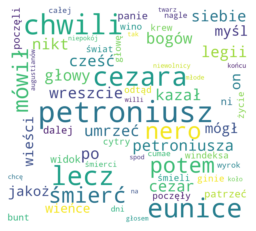

In [13]:
for chap_n, chapter in enumerate(chapters_word_counts):
    save_word_cloud(chapter, chap_n+1)

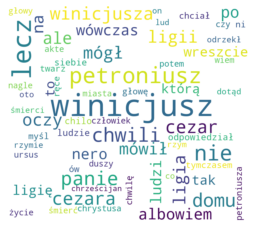

In [14]:
save_word_cloud(book_word_counts, name='whole_book')

# Task 2

In [15]:
chapters_highest_tf_idfs = []

for chapter in chapters_tf_idfs:
    chap_words = [item for item in chapter.items()]
    chapters_highest_tf_idfs.append(sorted(chap_words, key=lambda x: x[1], reverse=True)[:20])


In [16]:
print(chapters_highest_tf_idfs[0])

[('aulus', 0.009206757887990372), ('mały', 0.004835206684473932), ('aulusa', 0.004330095214477236), ('plaucjusz', 0.004277073807406041), ('tablinum', 0.003913462548934379), ('ruinę', 0.003913462548934379), ('forum', 0.0034525342079963894), ('świątyni', 0.0033678518334822943), ('vicus', 0.00336123122448853), ('spotkałem', 0.003281221277520626), ('tle', 0.003281221277520626), ('kapłanów', 0.0030388567612287453), ('wierszy', 0.0030388567612287453), ('petroniusz', 0.002933175015716551), ('pełno', 0.002911383842335313), ('wieczornych', 0.002911383842335313), ('piłkę', 0.002911383842335313), ('chryzotemis', 0.0028513825382706936), ('słuchała', 0.0026889849795908244), ('piasku', 0.0026889849795908244)]


In [19]:
def find_chapters(word, chapters):
    chaps_list = []
    for i,chapter in enumerate(chapters):
        chaps_list.append((i, chapter.get(word.lower(), 0)))
    
    return sorted(chaps_list, key=lambda x: x[1], reverse=True)

In [23]:
find_chapters("cezar", chapters_tf_idfs)

[(36, 0.0022732351515832895),
 (3, 0.0016375584526603028),
 (63, 0.0013401908729483573),
 (9, 0.0013121206306021423),
 (39, 0.0011144495025049283),
 (64, 0.001095641345937814),
 (29, 0.001095034005945609),
 (35, 0.0010647366223818964),
 (38, 0.0009867339394235158),
 (57, 0.0009795576925913448),
 (56, 0.0009760085705167384),
 (33, 0.0009699838262542894),
 (48, 0.000941224197982599),
 (47, 0.0009105747564933627),
 (45, 0.0008724805359113192),
 (68, 0.0008675631737926564),
 (34, 0.000790255564246776),
 (4, 0.0007641939445748079),
 (61, 0.0007524535348117871),
 (71, 0.0007507758234744142),
 (5, 0.0007473390635667079),
 (7, 0.0007223876789021717),
 (52, 0.0007169084909184824),
 (70, 0.0006987765641053692),
 (60, 0.0006907137575964611),
 (49, 0.0006822584182252929),
 (50, 0.0006692630197829063),
 (6, 0.0006512622918407249),
 (32, 0.00059961795317222),
 (12, 0.0005840181365043248),
 (54, 0.000506350311019962),
 (2, 0.00045851636674488474),
 (1, 0.0004445187548888116),
 (10, 0.0004292882318129